# Preface:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("Data/train.csv", parse_dates = ["Order Date", "Ship Date"], dayfirst = True,
                dtype = {
                    "Order ID": "category",
                    "Ship Mode" : "category",
                    "Customer ID" : "category",
                    "Segment" : "category",
                    "Country" : "category",
                    "City" : "category",
                    "State" : "category",
                    "Postal Code" : "category",
                    "Region" : "category",
                    "Product ID" : "category",
                    "Category" : "category",
                    "Sub-Category" : "category",
                    "Product Name" : "category"
                }
                )

df.head(10)
df.tail(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9790,9791,CA-2018-144491,2018-03-27,2018-04-01,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Houston,Texas,77070,Central,FUR-CH-10001714,Furniture,Chairs,"Global Leather & Oak Executive Chair, Burgundy",211.246
9791,9792,CA-2015-127166,2015-05-21,2015-05-23,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Houston,Texas,77070,Central,OFF-EN-10003134,Office Supplies,Envelopes,Staple envelope,56.064
9792,9793,CA-2015-127166,2015-05-21,2015-05-23,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Houston,Texas,77070,Central,FUR-CH-10003396,Furniture,Chairs,Global Deluxe Steno Chair,107.772
9793,9794,CA-2015-127166,2015-05-21,2015-05-23,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Houston,Texas,77070,Central,OFF-PA-10001560,Office Supplies,Paper,"Adams Telephone Message Books, 5 1/4” x 11”",4.832
9794,9795,CA-2015-127166,2015-05-21,2015-05-23,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Houston,Texas,77070,Central,OFF-BI-10000977,Office Supplies,Binders,Ibico Plastic Spiral Binding Combs,18.240
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


# Introduction
The focus of this project will be on answering the following questions:
### General Questions
1. How many items are sold on each order
1. What is the distribution of sales?
1. What are the statistics of each main category?
1. What portion of sales does each Category represent?
1. What is the percentage of each category that is made up of its sub categories?
### Product & Category Behavior
1. Which product categories are sold together? Which product sub categories are sold together?
1. Are there Categories, Sub-Categories, or Products that trend amongs certain segments?
1. Does the popularity of products change over time?
### Customer Behavior
1. How does customer segment impact ordering habits? (Sales, number of order, order frequency)
1. How many orders are from repeat customers -> do some additional statistics on this how many orders do the customers make, how often do they make them, are the values of the orders consistent? Bin customers by number of orders and see if they spend different amounts per transaction?
1. What is the revenue breakdown? (One time customer vs repeat, Segment)
1. How does sales break down per customer? (Build a distribution that shows % of customers vs % of sales, 5% customers give 50% sales etc.)
1. What is the average time it takes for a customer to reorder?
1. Is total spend indicative of more orders or just higher value orders?
1. How does Ship Mode relate to order price and customer segment?
1. How do  seasonal sales trends vary across Regions and Segments?
### Geography (If Time)
1. What are the outlying states for purchase amount and frequency?
1. What are the outlying cities for purchase amount and frequency?
1. How are sales broken down by state and then within each state at the city level?
1. If additional time is available, map the sales by state as a whole and by individual cities







# General Exploration
This section is for general exploration and clean up of the data before moving on to answer the various questions.

In [2]:
df.select_dtypes(include = 'category').apply(lambda col: col.nunique())
#print((df.dtypes))

Order ID        4922
Ship Mode          4
Customer ID      793
Segment            3
Country            1
City             529
State             49
Postal Code      626
Region             4
Product ID      1861
Category           3
Sub-Category      17
Product Name    1849
dtype: int64

In [3]:
print(df.columns[df.isna().any()])
print(df[['Order ID', 'Customer ID', 'State', 'City', 'Postal Code']][df.isna().any(axis=1)])
#print('\n The count of empty strings is:', (df == '').sum()) #returned 0

#5 unique customers are affected by the missing postal code for burlington vermont.

Index(['Postal Code'], dtype='object')
            Order ID Customer ID    State        City Postal Code
2234  CA-2018-104066    QJ-19255  Vermont  Burlington         NaN
5274  CA-2016-162887    SV-20785  Vermont  Burlington         NaN
8798  US-2017-150140    VM-21685  Vermont  Burlington         NaN
9146  US-2017-165505    CB-12535  Vermont  Burlington         NaN
9147  US-2017-165505    CB-12535  Vermont  Burlington         NaN
9148  US-2017-165505    CB-12535  Vermont  Burlington         NaN
9386  US-2018-127292    RM-19375  Vermont  Burlington         NaN
9387  US-2018-127292    RM-19375  Vermont  Burlington         NaN
9388  US-2018-127292    RM-19375  Vermont  Burlington         NaN
9389  US-2018-127292    RM-19375  Vermont  Burlington         NaN
9741  CA-2016-117086    QJ-19255  Vermont  Burlington         NaN


In [4]:
#Do these lists look set up correctly?
for col in ['Ship Mode', 'Segment', 'Region', 'Category', 'Sub-Category']: #these are short enough where reading explicitly may have benefit
    print(col, list(df[col].unique()), '\n')  #changing to a list lets it print easier.

Ship Mode ['Second Class', 'Standard Class', 'First Class', 'Same Day'] 

Segment ['Consumer', 'Corporate', 'Home Office'] 

Region ['South', 'West', 'Central', 'East'] 

Category ['Furniture', 'Office Supplies', 'Technology'] 

Sub-Category ['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage', 'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper', 'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines', 'Copiers'] 



Of the lists viewed none appear to have duplicate entries or problems.

In [5]:
#What states are missing?

all_states = {
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado",
    "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho",
    "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana",
    "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota",
    "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada",
    "New Hampshire", "New Jersey", "New Mexico", "New York",
    "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon",
    "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota",
    "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington",
    "West Virginia", "Wisconsin", "Wyoming"
}

#print(all_states - set(df['State'].unique()))
#print(list(df['State'].unique()))

The states used are the continental states with the addition of DC for the purpose of shipping. Hawaii and Alaska aren't part of the sales data.

In [6]:
#Why is there 1861 unique product Id's and only 1849 product names?

pot_duplicate_name = df.groupby('Product Name', observed = False)['Product ID'].nunique()
pot_duplicate_name = pot_duplicate_name[pot_duplicate_name > 1]

print(pot_duplicate_name.sum(), len(pot_duplicate_name))
#print(pot_duplicate_name)


pot_duplicate_id = df.groupby('Product ID', observed = False)['Product Name'].nunique()
pot_duplicate_id = pot_duplicate_id[pot_duplicate_id > 1]

print(pot_duplicate_id.sum(), len(pot_duplicate_id))
#print(df.groupby('Product ID', observed = False)['Product Name'].unique())

60 16
64 32


There are 60 occurrences where a product name is associated with multiple product id's increasing the number of product Id's by 44.
There are 64 occurrences where a product Id is used for more than 1 name meaning there should be 32 less prodcut Id's. 

44 - 32 explains the 12 ID discrepancy.

# General Questions
1. How many items are sold on each order?
1. What is the price distribution of items sold?
1. What are the statistics of each main category?
1. What portion of sales does each Category represent?
1. What is the percentage of each category that is made up of its sub categories?

## Questions 1: How many items are sold on each order?

In [7]:
#1 Code
print(df.groupby('Order ID', observed = False)['Sales'].count().describe()) #basic statistics about how many items are on each order
items_per_order = df.groupby('Order ID', observed = False)['Sales'].count()
print(items_per_order.value_counts())

count    4922.000000
mean        1.991061
std         1.406115
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        14.000000
Name: Sales, dtype: float64
Sales
1     2499
2     1198
3      590
4      333
5      153
6       69
7       48
8       15
9       10
10       3
11       2
14       1
12       1
Name: count, dtype: int64


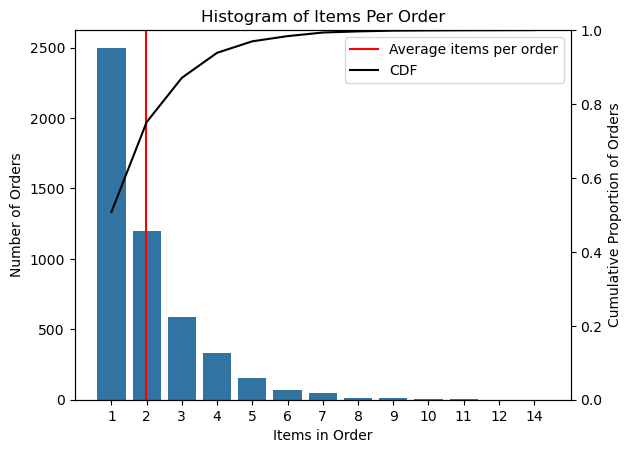

In [8]:
# Type of graph that is valuable in this case is one that displays the general shape of the data.
# CDF adds a stronger understanding of how it fits in with total transaction counts

counts = items_per_order.value_counts().sort_index()
cdf = counts.cumsum() / counts.sum()

fig, ax1 = plt.subplots() #define subplots to allow for CDF

sns.barplot(x = counts.index, y = counts.values)
plt.axvline(items_per_order.mean()-1,  label = "Average items per order", color = 'Red')
plt.title("Histogram of Items Per Order")
plt.xlabel("Items in Order") 
plt.ylabel("Number of Orders")


bar_locs = ax1.get_xticks()
ax2 = ax1.twinx()
ax2.plot(bar_locs, cdf, label='CDF', color = 'Black')
ax2.set_ylabel("Cumulative Proportion of Orders")
ax2.set_ylim(0, 1)

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc="upper right")
plt.show()
#print(counts)
#print(cdf)

### Question 1: Assessment
The plot demonstrates that the vast majority of orders contain 1 or 2 items, this is shown by the 75th percentile being 2 from .describe above, but reinforced by the cumulative proportion showing that it is 75.11%. It is also interesting that no one purchased 13 items.

## Question 2: What is the distribution of sales?

In [9]:
#this problem statement was originally around price of each item sold, but that isn't given by the data set. There is no clean way to tell if the customer ordered 1 or 30 of an individual line item.
#2 Code
print('\nStatistics about the value of the sale for each type of item sold:\n', df['Sales'].describe())
print('\nThe median value of sales is\n', df['Sales'].median())


Statistics about the value of the sale for each type of item sold:
 count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64

The median value of sales is
 54.489999999999995


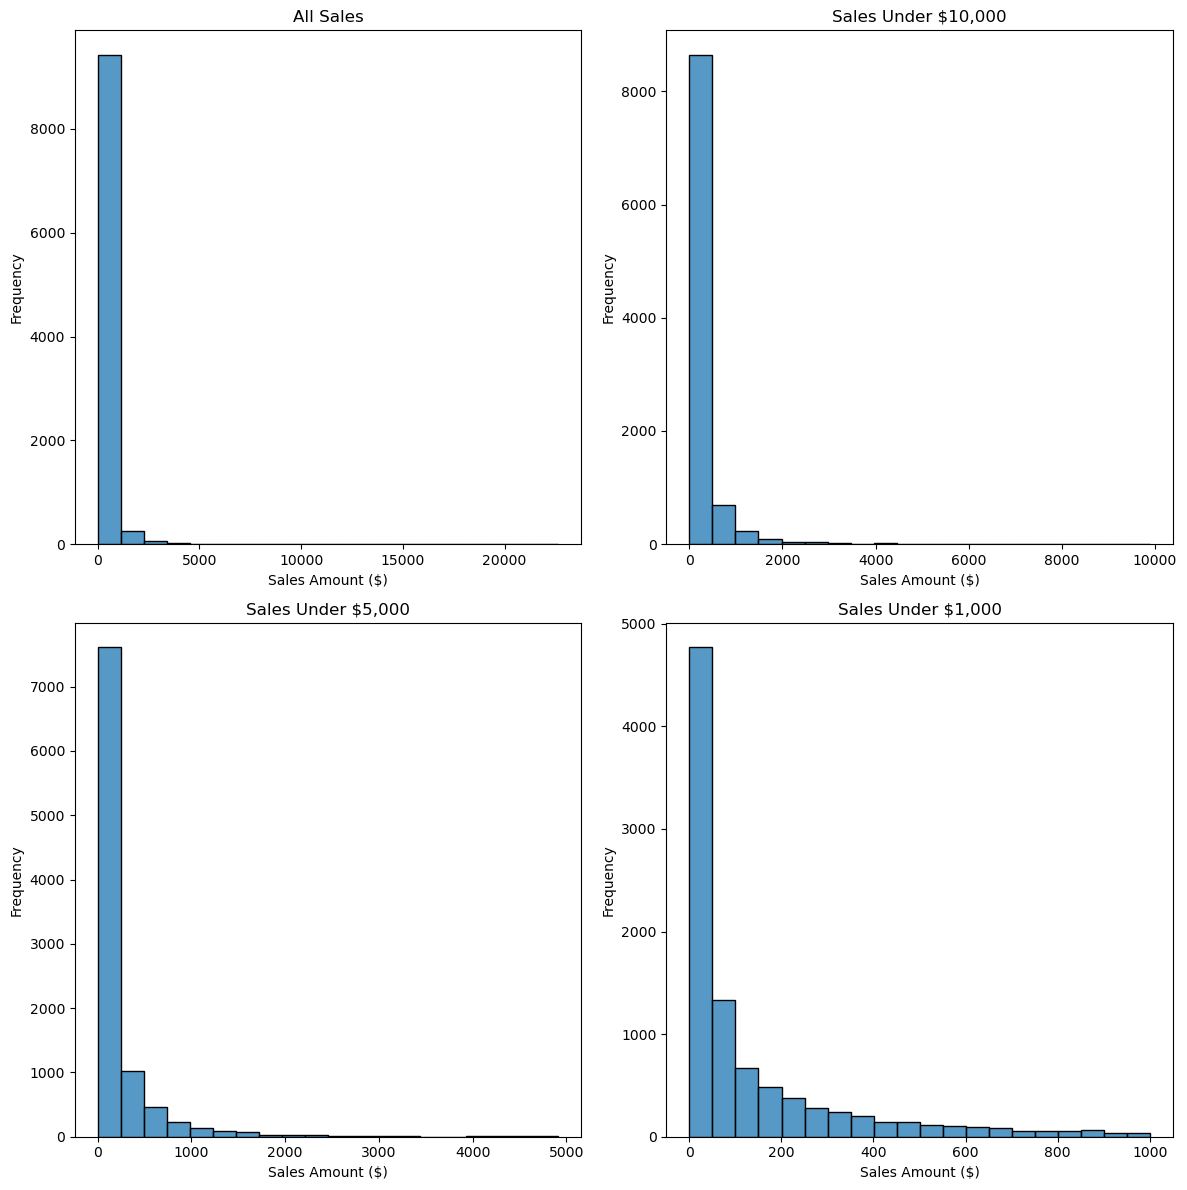

In [10]:
#the best visual exploration for this data is assessing the distribution and trying to decipher any patterns

fig, axes = plt.subplots(2, 2, figsize = [12, 12])

plt.title("Distribution of Sales") 
plt.xlabel("Sales Amount ($)")
plt.ylabel("Frequency")

sns.histplot(df['Sales'], bins = 20, ax = axes[0,0]) #default gives too many bins
axes[0,0].set_title("All Sales")
axes[0,0].set_xlabel("Sales Amount ($)")
axes[0,0].set_ylabel("Frequency")

sns.histplot(df[df['Sales'] < 10000]['Sales'], bins = 20, ax = axes[0,1]) #default gives too many bins
axes[0,1].set_title("Sales Under $10,000")
axes[0,1].set_xlabel("Sales Amount ($)")
axes[0,1].set_ylabel("Frequency")

sns.histplot(df[df['Sales'] < 5000]['Sales'], bins = 20, ax = axes[1,0])
axes[1,0].set_title("Sales Under $5,000")
axes[1,0].set_xlabel("Sales Amount ($)")
axes[1,0].set_ylabel("Frequency")

sns.histplot(df[df['Sales'] < 1000]['Sales'], bins = 20, ax = axes[1,1])
axes[1,1].set_title("Sales Under $1,000")
axes[1,1].set_xlabel("Sales Amount ($)")
axes[1,1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

### Question 2: Assesment
The distribution of sales per line item shows that it is primarily under \\$210.60 with that being the 75th percentile. The mean being \\$230.77 is disproportionately impacted by a small amount of transactions that are significantly higher. The maximum transaction value of \\$22,638.48 is 100x higher than the mean, but the frequency of sales above the mean is shown to rapidly fall of in the "Sales under \\$1,000" chart. The mean and median beingg so far apart also shows the data is not normally distributed.


## Question 3: What are the statistics of each main category?

In [11]:
#3
print('\nStatisticas about categories\n', df.groupby(['Category'], observed = False)['Sales'].describe()) #There is a wildly expensive technology item. Digging into this more there is not a quantity column. Different product ID's will have different sales.
#print(df[df['Sales'] == df['Sales'].max()])


Statisticas about categories
                   count        mean          std    min    25%      50%  \
Category                                                                  
Furniture        2078.0  350.653790   501.489219  1.892  47.19  182.610   
Office Supplies  5909.0  119.381001   383.761427  0.444  11.76   27.360   
Technology       1813.0  456.401474  1116.818701  0.990  67.98  167.944   

                     75%        max  
Category                             
Furniture        435.237   4416.174  
Office Supplies   79.470   9892.740  
Technology       453.576  22638.480  


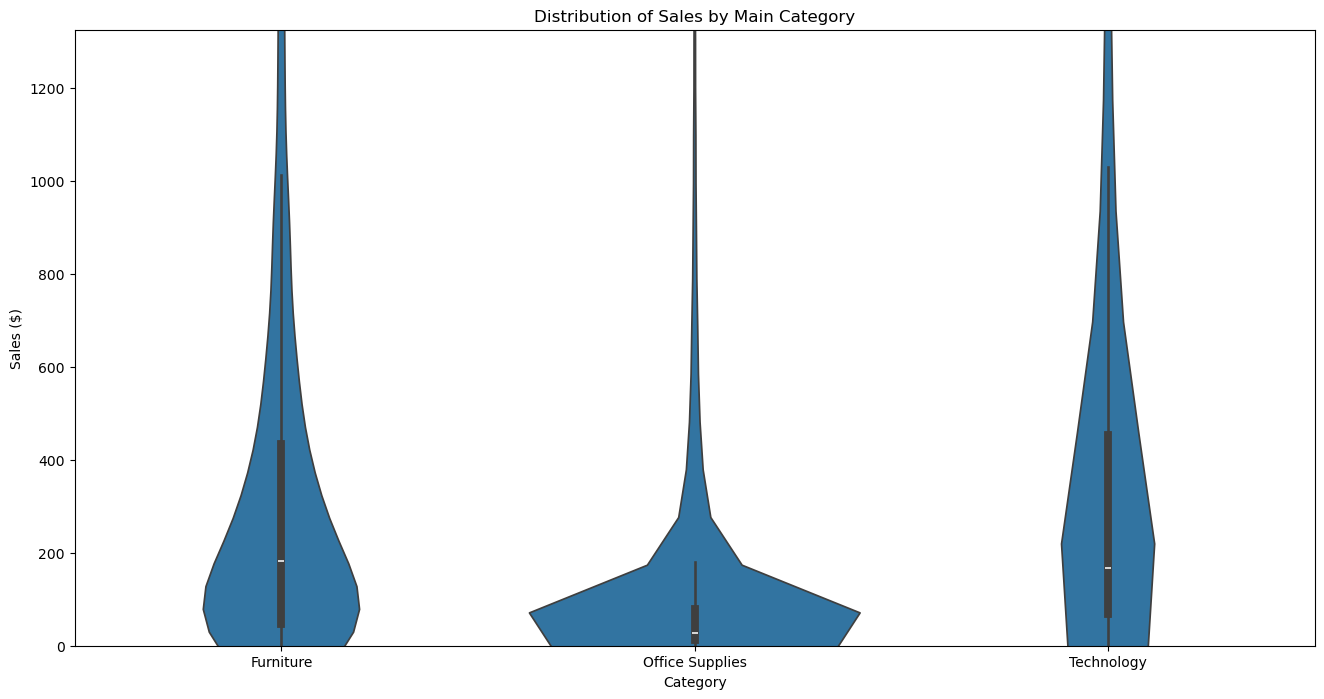

In [12]:
plt.figure(figsize = (16, 8))
sns.violinplot(data=df, x='Category', y='Sales', 
#    scale='width'            # makes each violin the same width, leaving off to allow for cross category comparison
)

plt.title("Distribution of Sales by Main Category")
plt.xlabel("Category")
plt.ylabel("Sales ($)")
#plt.yscale('log') #the log scale does not align with how I think of finances, but does even out the heights with how skewed the data is
plt.ylim(0, df['Sales'].quantile(0.97)) #the vertical shape of the violins gets lost if we don't clip some of the data off the top. The top is very narrow and follows the lines already formed.
plt.show()

### Question 3: Assesment
Office supplies are the most frequently sold items, with a count of 5909, and has a heavy concentration towards lowers sales per line item. Furniture represents a lower volume of sales frequency, 2078, overall than office supplies but the sales per line is shifting upward. Technology represents the lowest volume of sales frequency, 1813, and has shifted to the highest price per line item. Although the 75th percentile for sales of furniture and technology is about the same in the mid \\$400 range. Office supplies 75th percentile only lands at about \\$80.

## Question 4: What portion of sales does each Category represent?

In [13]:
#4 Total sales and category output
#print(df['Sales'].sum())
#print(df.groupby(['Category'], observed = False)['Sales'].sum())

quantile_trim = 0.99
category_trim_limit = df.groupby('Category', observed = True)['Sales'].transform(lambda x: x.quantile(quantile_trim))

#removed_upper_outliers = df['Sales'].quantile(.99)
df_under_removed_upper_outliers = df[df['Sales'] <= category_trim_limit]
trimmed_category_sales = (
    df_under_removed_upper_outliers
    .groupby('Category', observed = True)['Sales']
    .sum()
    .to_frame(name='Category Sales')
)
trimmed_category_sales['Portion of Total'] = trimmed_category_sales['Category Sales'] / trimmed_category_sales['Category Sales'].sum()
print('\nTrimmed data set\n', trimmed_category_sales)

category_sales = df.groupby(['Category'], observed = False)['Sales'].sum().to_frame(name = 'Category Sales')
category_sales['Portion of Total'] = category_sales['Category Sales'] / df['Sales'].sum()
print('\nFull data set\n', category_sales) 

print('\nFull sales:', df['Sales'].sum(), '\nTrimmed sales:', trimmed_category_sales['Category Sales'].sum())


Trimmed data set
                  Category Sales  Portion of Total
Category                                         
Furniture           659937.1027          0.356023
Office Supplies     530383.5980          0.286131
Technology          663315.4880          0.357846

Full data set
                  Category Sales  Portion of Total
Category                                         
Furniture           728658.5757          0.322196
Office Supplies     705422.3340          0.311922
Technology          827455.8730          0.365882

Full sales: 2261536.7827000003 
Trimmed sales: 1853636.1886999998


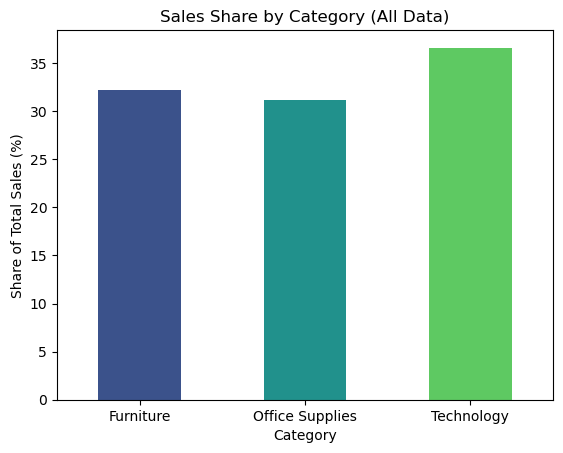

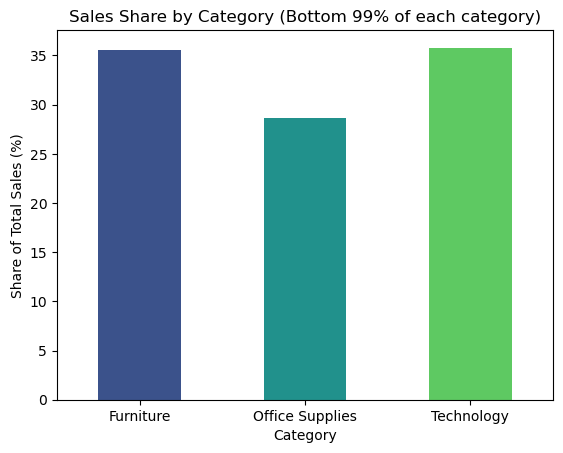

In [14]:
(category_sales['Portion of Total']*100).plot(kind = 'bar',
                                        ylabel = 'Share of Total Sales (%)',
                                        title = 'Sales Share by Category (All Data)',
                                       color = sns.color_palette("viridis", n_colors = 3)
                                       )
plt.xticks(rotation = 0) #make the labels horizontal
plt.show()
sns.set_palette("deep") #set back to default after
(trimmed_category_sales['Portion of Total']*100).plot(kind = 'bar',
                                        ylabel = 'Share of Total Sales (%)',
                                        title = f"Sales Share by Category (Bottom {quantile_trim*100:.0f}% of each category)",
                                       color = sns.color_palette("viridis", n_colors = 3)
                                       )
plt.xticks(rotation = 0) #make the labels horizontal
plt.show()



### Questions 4: Assesment
Each category of sales represents a roughly equal portion. Furniture makes up 32%, Office Supplies 31%, and Technology 37%. It does take a drastically different number of line item occurences to get there though, 5809 for Office Supplies, 2078 for Furniter, and only 1813 for Technology. The bottom 99% of each category plot was generated to see if the extreme outlier in electronics skewed the data so so it had disproportionate share of total sales. Technologies share did not shift drastically based on this. I was surprised to see that office supplies was so negatively impacted by removing its top 1% of lines.

## Question 5: What is the percentage of each category that is made up of its sub categories?

In [29]:
#5 Total sales of each category found in question 4
#print(df.groupby(['Category'], observed = False)['Sales'].sum().to_frame(name = 'Category Sales'))
#print(df.groupby(['Category','Sub-Category'], observed = True)['Sales'].sum())

cat_breakdown = df.groupby(['Category'], observed = False)['Sales'].sum().to_frame(name = 'Category Sales')
sub_cat_breakdown = df.groupby(['Category','Sub-Category'], observed = True)['Sales'].sum().to_frame('Sub-Category Sales')
cat_sub_cat_breakdown = sub_cat_breakdown.join(cat_breakdown, on='Category')
cat_sub_cat_breakdown['Proportion of Category'] = cat_sub_cat_breakdown['Sub-Category Sales'] / cat_sub_cat_breakdown['Category Sales']

print(merged)


                              Sub-Category Sales  Category Sales  \
Category        Sub-Category                                       
Furniture       Bookcases            113813.1987     728658.5757   
                Chairs               322822.7310     728658.5757   
                Furnishings           89212.0180     728658.5757   
                Tables               202810.6280     728658.5757   
Office Supplies Appliances           104618.4030     705422.3340   
                Art                   26705.4100     705422.3340   
                Binders              200028.7850     705422.3340   
                Envelopes             16128.0460     705422.3340   
                Fasteners              3001.9600     705422.3340   
                Labels                12347.7260     705422.3340   
                Paper                 76828.3040     705422.3340   
                Storage              219343.3920     705422.3340   
                Supplies              46420.3080

C:\Users\kylew\AppData\Local\Temp\ipykernel_36532\2685790798.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data.index, rotation=45, ha='right')
C:\Users\kylew\AppData\Local\Temp\ipykernel_36532\2685790798.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data.index, rotation=45, ha='right')
C:\Users\kylew\AppData\Local\Temp\ipykernel_36532\2685790798.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data.index, rotation=45, ha='right')


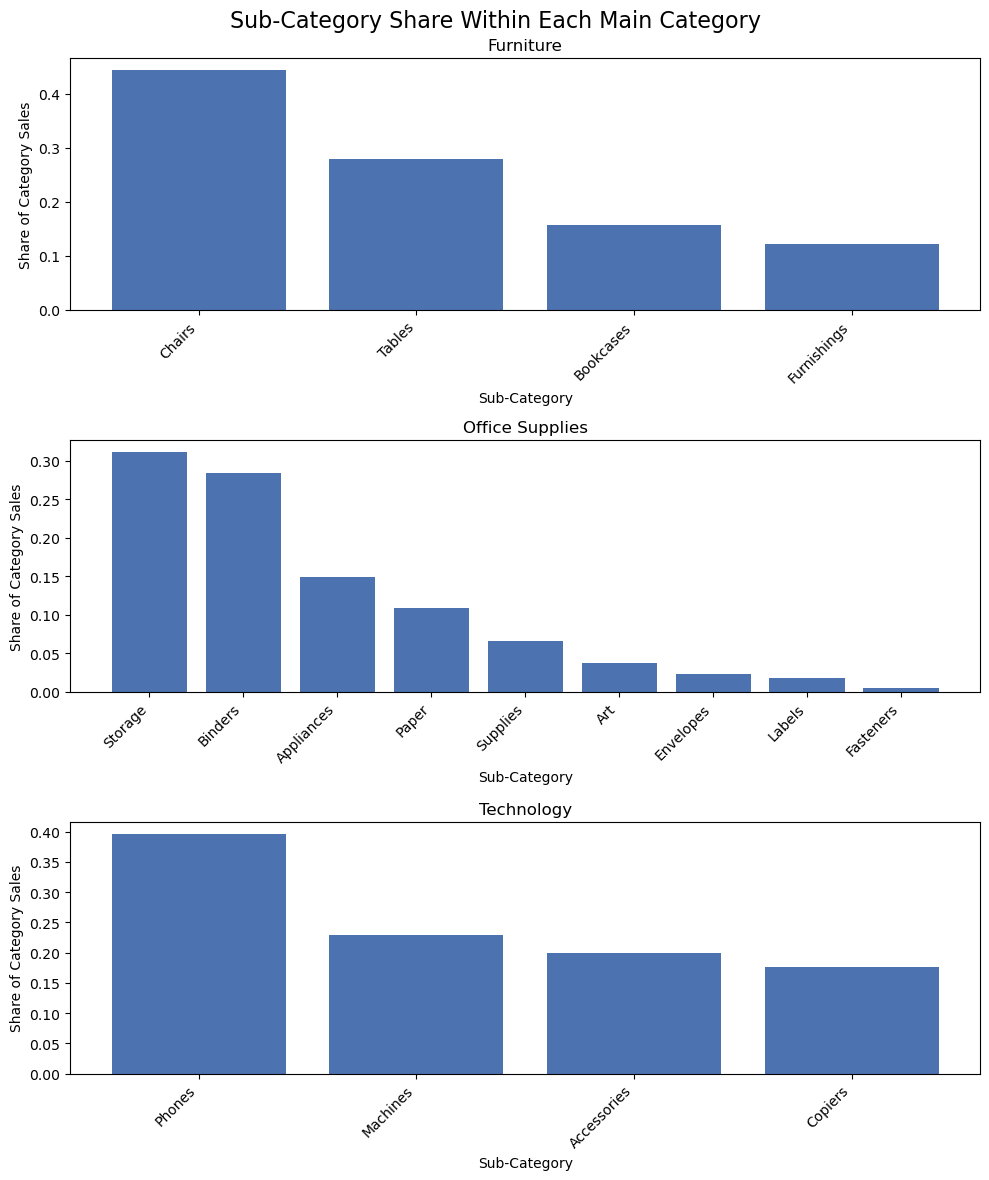

In [40]:
#best plot style is a stacked bar chart to see them all side by side, single bar charts for each category
categories = merged.index.get_level_values('Category').unique()
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=False)

for ax, cat in zip(axes, categories):
    # Slice data for this category and sort by share descending
    data = (
        merged.xs(cat)
              .sort_values('Proportion of Category', ascending=False)
    )

    ax.bar(data.index, data['Proportion of Category'])
    ax.set_title(cat)
    ax.set_xlabel("Sub-Category")
    ax.set_xticklabels(data.index, rotation=45, ha='right')

    # Percent y-axis


axes[0].set_ylabel("Share of Category Sales")
axes[1].set_ylabel("Share of Category Sales")
axes[2].set_ylabel("Share of Category Sales")

fig.suptitle("Sub-Category Share Within Each Main Category", fontsize=16)
plt.tight_layout()
plt.show()

### Question 5: Assesment

# Product & Category Behavior
1. Which product categories are sold together? Which product sub categories are sold together?
1. Are there Categories, Sub-Categories, or Products that trend amongs certain segments?
1. Does the popularity of products change over time?

In [17]:
#Question 1
cats_per_order = df.groupby(['Order ID'], observed = True)['Category'].nunique() #Figures out how categories are in an order
multiple_cat_orders = cats_per_order[cats_per_order > 1]
print(len(multiple_cat_orders)) #determines how many orders have more than 2 categories
print(cats_per_order.value_counts()) #Determines the number of categories per order

#Question 2
print(df.groupby(['Segment'], observed = True)['Order ID'].nunique()) #how many transactions did each segment have
print(df.groupby(['Segment'], observed = True)['Category'].value_counts()) #what were the counts of unique items purchased for each category
print('\neye break\n')
print(df.groupby(['Segment', 'Category', 'Sub-Category'], observed = True).size().reset_index (name = 'Count')) #What are the counts for unique sub categories

#Question 3 Assess with the top 10 product ID's each month. Then Look for the number of times each of them appears in that list
monthly = df.groupby([pd.Grouper(key='Order Date', freq='QS'), 'Product ID'], observed = True).size() #ME for months end produces a lot of tables that are hard to absorb
monthly = monthly.to_frame(name='Count').reset_index()
top10 = (
    monthly
    .sort_values(['Order Date','Count'], ascending=[True,False])
    .groupby('Order Date')
    .head(10)
)
print('\neye break\n')
#print(monthly.info)
print(len(top10))
print(top10['Product ID'].value_counts()[top10['Product ID'].value_counts() > 1])

for month, group in top10.groupby('Order Date'):
    print(f"\nTop 10 products for {month.date()}:\n")
    print(group)

1682
Category
1    3240
2    1364
3     318
Name: count, dtype: int64
Segment
Consumer       2537
Corporate      1491
Home Office     894
Name: Order ID, dtype: int64
Segment      Category       
Consumer     Office Supplies    3072
             Furniture          1093
             Technology          936
Corporate    Office Supplies    1783
             Furniture           628
             Technology          542
Home Office  Office Supplies    1054
             Furniture           357
             Technology          335
Name: count, dtype: int64

eye break

        Segment         Category Sub-Category  Count
0      Consumer        Furniture    Bookcases    130
1      Consumer        Furniture       Chairs    324
2      Consumer        Furniture  Furnishings    481
3      Consumer        Furniture       Tables    158
4      Consumer  Office Supplies   Appliances    240
5      Consumer  Office Supplies          Art    423
6      Consumer  Office Supplies      Binders    769
7      Co

# Customer Behavior
1. How does customer segment impact ordering habits? (Sales, number of order, order frequency)
1. How many orders are from repeat customers -> do some additional statistics on this how many orders do the customers make, how often do they make them, are the values of the orders consistent? Bin customers by number of orders and see if they spend different amounts per transaction?
1. What is the revenue breakdown? (One time customer vs repeat, Segment)
1. How does sales break down per customer? (Build a distribution that shows % of customers vs % of sales, 5% customers give 50% sales etc.)
1. What is the average time it takes for a customer to reorder?
1. Is total spend indicative of more orders or just higher value orders?
1. How does Ship Mode relate to order price and customer segment?
1. How do seasonal sales trends vary across Regions, and Segments?

In [18]:
#Question 1
#total sales by segment
print(df.groupby('Segment', observed = True)['Sales'].sum().sort_values(ascending=False).map(lambda x: f"${x:,.2f}"))
#number of orders by segment
print(df.groupby('Segment', observed = True)['Order ID'].nunique())
#Customers per segment
print(df.groupby('Segment', observed = True)['Customer ID'].nunique())
#average order by segment
df.groupby('Segment', observed = True)['Sales'].sum().sort_values(ascending=False)/df.groupby('Segment', observed = True)['Order ID'].nunique()
#how many orders per member of segment
print(df.groupby(['Segment', 'Customer ID'], observed = True)['Order ID'].nunique().groupby('Segment', observed = True).describe())

#Question 2
print(df.groupby('Customer ID', observed = True)['Order ID'].nunique().sort_values(ascending = False)) #sum this when the number of orders is greater than 1 to get total transactions.

#Question 3 
print(df.groupby('Customer ID', observed = True).agg(
    Orders=('Order ID', 'nunique'),
    TotalSales=('Sales', 'sum')
).sort_values('Orders', ascending=False)) #793 rows aligns with the 793 customers from the exploratory stage



#question 4

customer_sales = df.groupby('Customer ID', observed = True).agg(
    Orders=('Order ID', 'nunique'),
    TotalSales=('Sales', 'sum')
).sort_values('Orders', ascending=False)

customer_sales['Percent Of Total'] = customer_sales['TotalSales'] / df['Sales'].sum()
customer_sales = customer_sales.sort_values('Percent Of Total', ascending = False) #sort by who makes up the highest portion of total sales.
print(customer_sales)
print(customer_sales['Percent Of Total'].sum()) #sums to .9 repeating, effectively 1.


#Question 5
print('\nQuestion 5\n')
customer_orders = df[['Customer ID','Order ID','Order Date', 'Segment']].drop_duplicates(subset=['Customer ID', 'Order ID']).sort_values(['Customer ID','Order Date'])
customer_orders['Delay'] = customer_orders.groupby('Customer ID', observed = True)['Order Date'].diff().dt.days
print(customer_orders)
print(customer_orders.groupby('Segment', observed = True)['Delay'].describe())

#question 6
print('\nQuestion 6\n')
customer_sales['Sales Per Order'] = customer_sales['Orders'] / customer_sales['TotalSales']

#question 7
print('\nQuestion 7\n')
shipping_segments = (df.groupby(['Ship Mode', 'Segment', 'Order ID'], observed=True)
      .agg(OrderPrice=('Sales', 'sum'))
      .reset_index()
      .sort_values(['Segment', 'Ship Mode', 'OrderPrice'], ascending=[True, True, False])
                    )
#question 8
order_sales = df.groupby('Order ID')['Sales'].sum().reset_index()
order_ = df[['Order ID', 'Ship Mode', 'Segment']].drop_duplicates()
orders = order_totals.merge(order_modes, on='Order ID')

Segment
Consumer       $1,148,060.53
Corporate        $688,494.07
Home Office      $424,982.18
Name: Sales, dtype: object
Segment
Consumer       2537
Corporate      1491
Home Office     894
Name: Order ID, dtype: int64
Segment
Consumer       409
Corporate      236
Home Office    148
Name: Customer ID, dtype: int64
             count      mean       std  min  25%  50%  75%   max
Segment                                                         
Consumer     409.0  6.202934  2.520580  1.0  4.0  6.0  8.0  17.0
Corporate    236.0  6.317797  2.595549  1.0  4.0  6.0  8.0  12.0
Home Office  148.0  6.040541  2.432429  1.0  4.0  6.0  8.0  12.0
Customer ID
EP-13915    17
ZC-21910    13
CK-12205    13
JE-15745    13
PG-18820    13
            ..
SM-20905     1
AR-10570     1
SC-20845     1
LD-16855     1
TC-21145     1
Name: Order ID, Length: 793, dtype: int64
             Orders  TotalSales
Customer ID                    
EP-13915         17   5478.0608
ZC-21910         13   8025.7070
CK-12205    

C:\Users\kylew\AppData\Local\Temp\ipykernel_36532\3620188749.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order_sales = df.groupby('Order ID')['Sales'].sum().reset_index()


NameError: name 'order_totals' is not defined

### Geography (If Time)
1. What are the outlying states for purchase amount and frequency?
1. What are the outlying cities for purchase amount and frequency?
1. How are sales broken down by state and then within each state at the city level?
1. If additional time is available, map the sales by state as a whole and by individual cities